<a href="https://colab.research.google.com/github/AyaTareekAhmmeed/Graduation-Project-/blob/main/categorical_dl_diabetes_retinopathy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetic-retinopathy-224x224-gaussian-filtered/train.csv
/kaggle/input/diabetic-retinopathy-224x224-gaussian-filtered/gaussian_filtered_images/gaussian_filtered_images/export.pkl
/kaggle/input/diabetic-retinopathy-224x224-gaussian-filtered/gaussian_filtered_images/gaussian_filtered_images/Mild/f481f76a6b75.png
/kaggle/input/diabetic-retinopathy-224x224-gaussian-filtered/gaussian_filtered_images/gaussian_filtered_images/Mild/abdb365cacbc.png
/kaggle/input/diabetic-retinopathy-224x224-gaussian-filtered/gaussian_filtered_images/gaussian_filtered_images/Mild/33ffddea8c6e.png
/kaggle/input/diabetic-retinopathy-224x224-gaussian-filtered/gaussian_filtered_images/gaussian_filtered_images/Mild/059bc89df7f4.png
/kaggle/input/diabetic-retinopathy-224x224-gaussian-filtered/gaussian_filtered_images/gaussian_filtered_images/Mild/278aa860dffd.png
/kaggle/input/diabetic-retinopathy-224x224-gaussian-filtered/gaussian_filtered_images/gaussian_filtered_images/Mild/d66b6f333dc7.png
/kaggle/i

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
datagen = ImageDataGenerator(rescale=1./255,
                                      zoom_range=0.2,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      validation_split=0.2
                                      )
train_data = datagen.flow_from_directory('../input/diabetic-retinopathy-224x224-gaussian-filtered/gaussian_filtered_images/gaussian_filtered_images',
                                                     target_size=(224,224),
                                                     batch_size=32,
                                                     class_mode = 'categorical',
                                                     subset = 'training')

valid_data = datagen.flow_from_directory('../input/diabetic-retinopathy-224x224-gaussian-filtered/gaussian_filtered_images/gaussian_filtered_images',
                                                     target_size=(224,224),
                                                     batch_size=32,
                                                     class_mode = 'categorical',
                                                     subset = 'validation')

Found 2931 images belonging to 5 classes.
Found 731 images belonging to 5 classes.


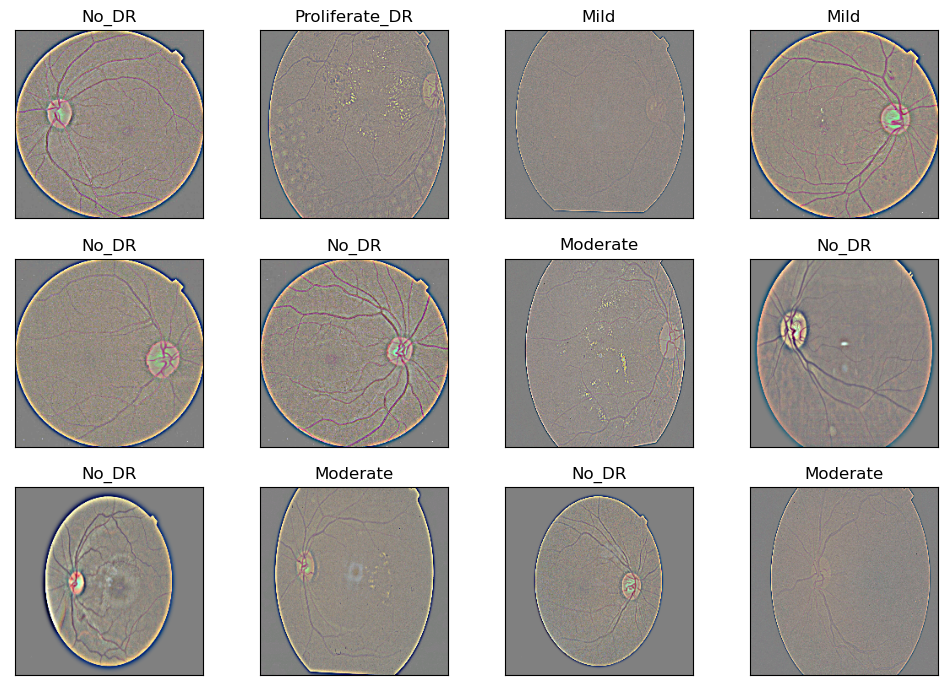

In [ ]:
# Display some pictures of the dataset with their labels
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(image_df.Filepath[i]))
    ax.set_title(image_df.Label[i])
plt.tight_layout()
plt.show()

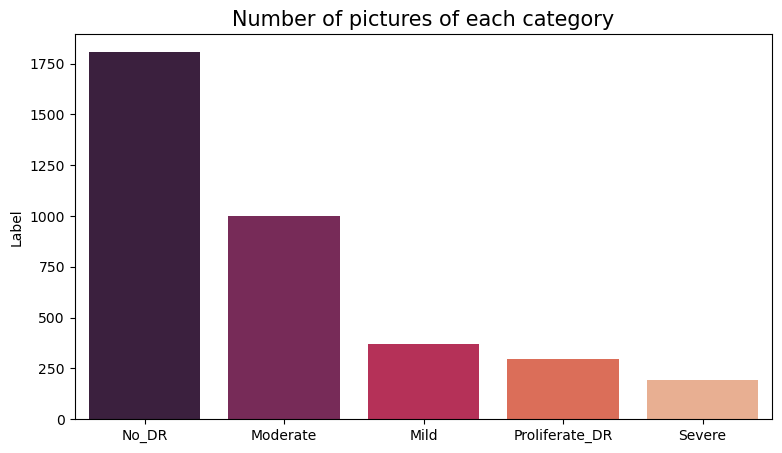

In [ ]:
# Display the number of pictures of each category
vc = image_df['Label'].value_counts()
plt.figure(figsize=(9,5))
sns.barplot(x = vc.index, y = vc, palette = "rocket")
plt.title("Number of pictures of each category", fontsize = 15)
plt.show()

In [ ]:
from tensorflow.keras import layers
# creating a CNN with an inception module
from keras.models import Model
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D

from keras.utils import plot_model

model = tf.keras.Sequential([
    layers.Conv2D(8, (1,1), padding="same", input_shape=(224,224,3), activation = 'relu'),
    layers.Conv2D(8, (1,1), padding="same", input_shape=(224,224,3), activation = 'relu'),
    layers.Conv2D(8, (3,3), padding="same", input_shape=(224,224,3), activation = 'relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.BatchNormalization(),
    
    layers.Conv2D(16, (1,1), padding="same", input_shape=(224,224,3), activation = 'relu'),
    layers.Conv2D(16, (3,3), padding="same", activation = 'relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.BatchNormalization(),
    
    layers.Conv2D(32, (1,1), padding="same", input_shape=(224,224,3), activation = 'relu'),
    layers.Conv2D(32, (3,3), padding="same", activation = 'relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.BatchNormalization(),
 
    layers.Flatten(),
    layers.Dense(32, activation = 'relu'),
    layers.Dropout(0.15),
    layers.Dense(5, activation = 'softmax')
])
# summarize model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 8)       32        
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 8)       72        
                                                                 
 conv2d_2 (Conv2D)           (None, 224, 224, 8)       584       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 8)      0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 112, 112, 8)      32        
 ormalization)                                                   
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 16)      1

In [ ]:
import keras
batch_size = 50 #split training data into n batches for higher performance 
epochs = 40 #one forward%backward pass of all training examples

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 1e-5),
              loss= keras.losses.categorical_crossentropy,
              metrics = ['accuracy']
              )

history  = model.fit(train_data,
          epochs=epochs,
           verbose=1,
          validation_data=valid_data,
          batch_size=batch_size)

Epoch 1/40
92/92 [==============================] - 96s 1s/step - loss: 1.3868 - accuracy: 0.4817 - val_loss: 1.8640 - val_accuracy: 0.2654
Epoch 2/40
92/92 [==============================] - 87s 939ms/step - loss: 1.1443 - accuracy: 0.5831 - val_loss: 2.2147 - val_accuracy: 0.2572
Epoch 3/40
92/92 [==============================] - 87s 946ms/step - loss: 1.0764 - accuracy: 0.6114 - val_loss: 2.4050 - val_accuracy: 0.2654
Epoch 4/40
92/92 [==============================] - 88s 949ms/step - loss: 1.0461 - accuracy: 0.6199 - val_loss: 2.2746 - val_accuracy: 0.2709
Epoch 5/40
92/92 [==============================] - 88s 957ms/step - loss: 1.0201 - accuracy: 0.6336 - val_loss: 1.9590 - val_accuracy: 0.2695
Epoch 6/40
92/92 [==============================] - 87s 945ms/step - loss: 1.0193 - accuracy: 0.6366 - val_loss: 1.5005 - val_accuracy: 0.3817
Epoch 7/40
92/92 [==============================] - 87s 938ms/step - loss: 0.9926 - accuracy: 0.6493 - val_loss: 1.1040 - val_accuracy: 0.5964
Ep

In [ ]:
loss, acc = model.evaluate_generator(valid_data, verbose=1)
print("Loss: ", loss)
print("Accuracy: ", acc)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


23/23 [==============================] - 10s 442ms/step - loss: 0.7927 - accuracy: 0.6963
Loss:  0.7926808595657349
Accuracy:  0.6963064074516296


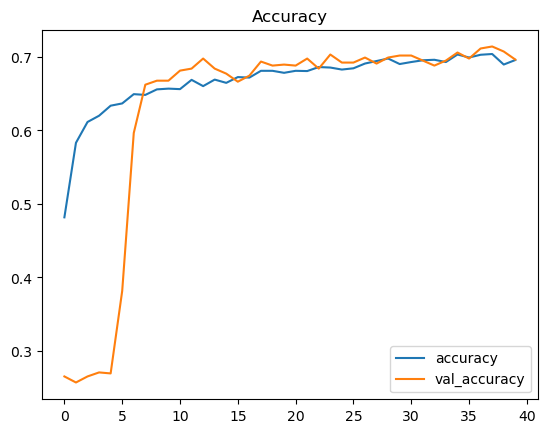

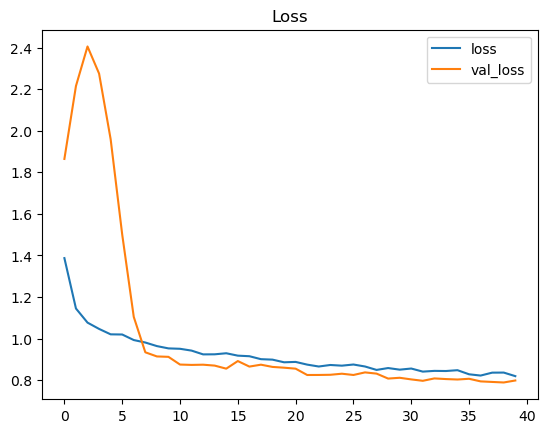

 ## Test Loss: 0.78589

## Accuracy on the test set: 69.77%



23/23 [==============================] - 10s 432ms/step


In [ ]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

results = model.evaluate(valid_data, verbose=0)

printmd(" ## Test Loss: {:.5f}".format(results[0]))
printmd("## Accuracy on the test set: {:.2f}%".format(results[1] * 100))
print('\n')

# Predict the label of the test_images
pred = model.predict(valid_data)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_data.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]